In [ ]:
import numpy as np

def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

In [ ]:
W = np.array([[1.1, 1.2, 0.8, 0.4],
              [0.2, 0.4, 1.0, 0.2],
              [0.6, 1.5, 1.2, 0.7]])
A = np.array([[1, 0.1, 0.4, 0.6]])

In [ ]:
W.shape

(3, 4)

In [ ]:
A.shape

(1, 4)

In [ ]:
Z = np.dot(W, A[0])

In [ ]:
y_probas = logistic(Z)
print('Net Input: \n', Z)

Net Input: 
 [1.78 0.76 1.65]


In [ ]:
print('Output: \n', y_probas)

Output: 
 [0.85569687 0.68135373 0.83889105]


In [ ]:
y_class = np.argmax(Z, axis=0)

In [ ]:
print(y_class)

0


In [ ]:
Z

array([1.78, 0.76, 1.65])

In [ ]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

y_probas = softmax(Z)
print('Probabilities:\n', y_probas)

Probabilities:
 [0.44668973 0.16107406 0.39223621]


In [ ]:
np.sum(y_probas)

1.0

In [ ]:
import tensorflow as tf
Z_tensor = tf.expand_dims(Z, axis=0)
tf.keras.activations.softmax(Z_tensor)

<tf.Tensor: shape=(1, 3), dtype=float64, numpy=array([[0.44668973, 0.16107406, 0.39223621]])>

In [ ]:
z = np.arange(-5, 5, 0.001)
np.tanh(z)

array([-0.9999092 , -0.99990902, -0.99990884, ...,  0.99990866,
        0.99990884,  0.99990902])

In [ ]:
tf.keras.activations.tanh(z)

<tf.Tensor: shape=(10000,), dtype=float64, numpy=
array([-0.9999092 , -0.99990902, -0.99990884, ...,  0.99990866,
        0.99990884,  0.99990902])>

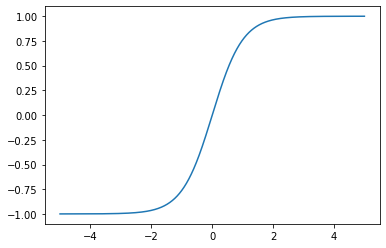

In [ ]:
import matplotlib.pyplot as plt
plt.plot(z, np.tanh(z))

In [ ]:
from scipy.special import expit
expit(z)

array([0.00669285, 0.0066995 , 0.00670616, ..., 0.99328718, 0.99329384,
       0.9933005 ])

In [ ]:
tf.keras.activations.sigmoid(z)

<tf.Tensor: shape=(10000,), dtype=float64, numpy=
array([0.00669285, 0.0066995 , 0.00670616, ..., 0.99328718, 0.99329384,
       0.9933005 ])>

In [ ]:
tf.keras.activations.relu(z)

<tf.Tensor: shape=(10000,), dtype=float64, numpy=array([0.   , 0.   , 0.   , ..., 4.997, 4.998, 4.999])>

In [ ]:
##TF V1.x style
g = tf.Graph()
with g.as_default():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b')
    c = tf.constant(3, name='c')
    z = 2*(a-b) + c

In [ ]:
with tf.compat.v1.Session(graph=g) as sess:
    print('Result: z =', sess.run(z))
    print('Result: z =', z.eval())

Result: z = 1
Result: z = 1


In [ ]:
a = tf.constant(1, name='a')
b = tf.constant(2, name='b')
c = tf.constant(3, name='c')

z = 2*(a-b) + c
tf.print('Result: z=', z)

Result: z= 1


In [ ]:
# TF-v1.x
g = tf.Graph()
with g.as_default():
    a = tf.compat.v1.placeholder(shape=None, dtype=tf.int32, name='tf_a')
    b = tf.compat.v1.placeholder(shape=None, dtype=tf.int32, name='tf_b')
    c = tf.compat.v1.placeholder(shape=None, dtype=tf.int32, name='tf_c')
    z = 2*(a - b) + c

with tf.compat.v1.Session(graph=g) as sess:
    feed_dict = {a:1, b:2, c:3}
    print('Resutl: z=', sess.run(z, feed_dict=feed_dict))

Resutl: z= 1


In [ ]:
#TF-v2 style
def compute_z(a, b, c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z

tf.print('Scalar Unputs:', compute_z(1, 2, 3))
tf.print('Rank 1 Inputs:', compute_z([1], [2], [3]))
tf.print('Rank 2 Inputs: ', compute_z([[1]], [[2]], [[3]]))

Scalar Unputs: 1
Rank 1 Inputs: [1]
Rank 2 Inputs:  [[1]]


In [ ]:
@tf.function
def compute_z(a, b, c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z

tf.print('Scalar Inputs:', compute_z(1, 2, 3))
tf.print('Rank 1 Inputs:', compute_z([1], [2], [3]))
tf.print('Rank 2 Inputs:', compute_z([[1]], [[2]], [[3]]))

Scalar Inputs: 1
Rank 1 Inputs: [1]
Rank 2 Inputs: [[1]]


In [ ]:
@tf.function(input_signature=(tf.TensorSpec(shape=[None], dtype=tf.int32),
                              tf.TensorSpec(shape=[None], dtype=tf.int32),
                              tf.TensorSpec(shape=[None], dtype=tf.int32),))
def compute_z(a, b, c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z

tf.print('Rank 1 Inputs:', compute_z([1], [2], [3]))
tf.print('Rank 1 Inputs:', compute_z([1, 2], [2, 4], [3, 6]))

Rank 1 Inputs: [1]
Rank 1 Inputs: [1 2]


In [ ]:
a = tf.Variable(initial_value=3.14, name='var_a')
b = tf.Variable(initial_value=[1, 2, 3], name='var_b')
c = tf.Variable(initial_value=[True, False], dtype=tf.bool)
d = tf.Variable(initial_value=['abc'], dtype=tf.string)
print(a)
print(b)
print(c)
print(d)

<tf.Variable 'var_a:0' shape=() dtype=float32, numpy=3.14>
<tf.Variable 'var_b:0' shape=(3,) dtype=int32, numpy=array([1, 2, 3], dtype=int32)>
<tf.Variable 'Variable:0' shape=(2,) dtype=bool, numpy=array([ True, False])>
<tf.Variable 'Variable:0' shape=(1,) dtype=string, numpy=array([b'abc'], dtype=object)>


In [ ]:
a.trainable

True

In [ ]:
w = tf.Variable([1, 2, 3], trainable=False)

In [ ]:
w.trainable

False

In [ ]:
print(w.assign([3, 1, 4], read_value=True))
w.assign_add([2, -1, 2], read_value=False)

print(w.value())

<tf.Variable 'UnreadVariable' shape=(3,) dtype=int32, numpy=array([3, 1, 4], dtype=int32)>
tf.Tensor([5 0 6], shape=(3,), dtype=int32)


In [ ]:
tf.random.set_seed(1)
init = tf.keras.initializers.GlorotNormal()
tf.print(init(shape=(3,)))

[-0.722795904 1.01456821 0.251808226]


In [ ]:
v = tf.Variable(init(shape=(2, 3)))
tf.print(v)

[[0.28982234 -0.782292783 -0.0453658961]
 [0.960991383 -0.120003454 0.708528221]]


In [ ]:
class MyModule(tf.Module):
    def __init__(self):
        init = tf.keras.initializers.GlorotNormal()
        self.w1 = tf.Variable(init(shape=(2, 3)), trainable=True)
        self.w2 = tf.Variable(init(shape=(1, 2)), trainable=False)

m = MyModule()
print('All module variables: ', [v.shape for v in m.variables])
print('Trainable variables: ', [v.shape for v in m.trainable_variables])

All module variables:  [TensorShape([2, 3]), TensorShape([1, 2])]
Trainable variables:  [TensorShape([2, 3])]


In [ ]:
@tf.function
def f(x):
    w = tf.Variable([1, 2, 3])
f([1])

In [ ]:
tf.random.set_seed(1)
w = tf.Variable(tf.random.uniform((3, 3)))

@tf.function
def compute_z(x):
    return tf.matmul(w, x)

x = tf.constant([[1], [2], [3]], dtype=tf.float32)
tf.print(compute_z(x))

[[3.8610158]
 [2.94593048]
 [3.82629013]]


In [ ]:
w = tf.Variable(1.0)
b = tf.Variable(0.5)
print(w.trainable, b.trainable)

x = tf.convert_to_tensor([1.4])
y = tf.convert_to_tensor([2.1])

with tf.GradientTape() as tape:
    z = tf.add(tf.multiply(w, x), b)
    loss = tf.reduce_sum(tf.square(y - z))

dloss_dw = tape.gradient(loss, w)

tf.print('dL/dw: ', dloss_dw)

True True
dL/dw:  -0.559999764


In [ ]:
with tf.GradientTape() as tape:
    tape.watch(x)
    z = tf.add(tf.multiply(w, x), b)
    loss = tf.reduce_sum(tf.square(y - z))

dloss_dx = tape.gradient(loss, x)
tf.print('dL/dx:', dloss_dx)

dL/dx: [-0.399999857]


In [ ]:
with tf.GradientTape(persistent=True) as tape:
    z = tf.add(tf.multiply(w, x), b)
    loss = tf.reduce_sum(tf.square(y - z))

dloss_dw = tape.gradient(loss, w)
dloss_db = tape.gradient(loss, b)

tf.print('dL/dw:', dloss_dw)
tf.print('dL/db:', dloss_db)

dL/dw: -0.559999764
dL/db: -0.399999857


In [ ]:
optimizer = tf.keras.optimizers.SGD()

optimizer.apply_gradients(zip([dloss_dw, dloss_db], [w, b]))

tf.print('Updated weight: ', w)
tf.print('Updated bias: ', b)

Updated weight:  1.0056
Updated bias:  0.504
